In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu17.36+17-CA (build 17.0.4.1+1-LTS, mixed mode, sharing)
  Starting server from C:\Users\jorda\anaconda3\envs\pytorch\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\jorda\AppData\Local\Temp\tmp7pqjz9fd
  JVM stdout: C:\Users\jorda\AppData\Local\Temp\tmp7pqjz9fd\h2o_jorda_started_from_python.out
  JVM stderr: C:\Users\jorda\AppData\Local\Temp\tmp7pqjz9fd\h2o_jorda_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_jorda_dph4d5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.932 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [2]:
url = 'http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv'
iris = h2o.import_file(url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
train, test = iris.split_frame([0.8])

In [4]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

mDL = H2ODeepLearningEstimator()
mDL.train(['sepal_len','sepal_wid','petal_len','petal_wid'], 'class', train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1699281640099_1


Status of Neuron Layers: predicting class, 3-class classification, multinomial distribution, CrossEntropy loss, 41,803 weights/biases, 498.2 KB, 1,180 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight              weight_rms           mean_bias               bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  --------------------  ----------  -----------------------  -------------------  ----------------------  ---------------------
    1        4        Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.005594405503288726  0.003910478204488754  0.0         -0.00010689384102079202  0.10660919547080994  0.5012352177031965      0.01121225580573082
    3        200      Rectifier  0.0        0.0   0.0   0.019134674405222176  0.08657100796699524   0.0         -0.005027017912587802    0.07070448994636536  0.991834583400488       0.011175945401191711
    4        3        Softmax               0.0   0.0   0.01862010184476579   0.11441707611083984   0.0         0.0014660361917534222    0.3970547914505005   -0.0001489713910679096  0.0030935294926166534

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.1354590679362747
RMSE: 0.36804764356843084
LogLoss: 0.5720852714656749
Mean Per-Class Error: 0.14393939393939395
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error     Rate
-------------  -----------------  ----------------  --------  --------
33             0                  0                 0         0 / 33
0              41                 0                 0         0 / 41
0              19                 25                0.431818  19 / 44
33             60                 25                0.161017  19 / 118

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.838983
2    1
3    1

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_logloss    training_r2    training_classification_error    training_auc    training_pr_auc
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  ------------------  -------------  -------------------------------  --------------  -----------------
    2023-11-06 09:40:44  0.000 sec                     0         0             0          nan              nan                 nan            nan                              nan             nan
    2023-11-06 09:40:45  1.095 sec   291 obs/sec       1         1             118        0.454332         0.938965            0.679403       0.262712                         nan             nan
    2023-11-06 09:40:46  1.226 sec   2251 obs/sec      10        10            1180       0.368048         0.572085            0.789612       0.161017                         nan             nan

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
petal_wid   1                      1                    0.26112
petal_len   0.980975               0.980975             0.256153
sepal_len   0.938715               0.938715             0.245118
sepal_wid   0.909961               0.909961             0.237609

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this 

In [5]:
mDL

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1699281640099_1


Status of Neuron Layers: predicting class, 3-class classification, multinomial distribution, CrossEntropy loss, 41,803 weights/biases, 498.2 KB, 1,180 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight              weight_rms           mean_bias               bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  --------------------  ----------  -----------------------  -------------------  ----------------------  ---------------------
    1        4        Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.005594405503288726  0.003910478204488754  0.0         -0.00010689384102079202  0.10660919547080994  0.5012352177031965      0.01121225580573082
    3        200      Rectifier  0.0        0.0   0.0   0.019134674405222176  0.08657100796699524   0.0         -0.005027017912587802    0.07070448994636536  0.991834583400488       0.011175945401191711
    4        3        Softmax               0.0   0.0   0.01862010184476579   0.11441707611083984   0.0         0.0014660361917534222    0.3970547914505005   -0.0001489713910679096  0.0030935294926166534

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.1354590679362747
RMSE: 0.36804764356843084
LogLoss: 0.5720852714656749
Mean Per-Class Error: 0.14393939393939395
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error     Rate
-------------  -----------------  ----------------  --------  --------
33             0                  0                 0         0 / 33
0              41                 0                 0         0 / 41
0              19                 25                0.431818  19 / 44
33             60                 25                0.161017  19 / 118

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.838983
2    1
3    1

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_logloss    training_r2    training_classification_error    training_auc    training_pr_auc
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  ------------------  -------------  -------------------------------  --------------  -----------------
    2023-11-06 09:40:44  0.000 sec                     0         0             0          nan              nan                 nan            nan                              nan             nan
    2023-11-06 09:40:45  1.095 sec   291 obs/sec       1         1             118        0.454332         0.938965            0.679403       0.262712                         nan             nan
    2023-11-06 09:40:46  1.226 sec   2251 obs/sec      10        10            1180       0.368048         0.572085            0.789612       0.161017                         nan             nan

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
petal_wid   1                      1                    0.26112
petal_len   0.980975               0.980975             0.256153
sepal_len   0.938715               0.938715             0.245118
sepal_wid   0.909961               0.909961             0.237609

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this 

In [6]:
p = mDL.predict(test)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [7]:
p

predict,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,0.9999,9.96048e-05,1.79557e-21
Iris-setosa,0.998704,0.00129591,7.07949e-20
Iris-setosa,0.999791,0.000209021,1.03736e-20
Iris-setosa,0.999866,0.000133841,4.38166e-21
Iris-setosa,0.999685,0.000314933,1.56369e-20
Iris-setosa,0.998475,0.00152515,9.24227e-20
Iris-setosa,0.999983,1.69269e-05,1.15693e-22
Iris-setosa,0.995269,0.00473073,4.51538e-18
Iris-setosa,0.999588,0.000412174,4.31957e-20
Iris-setosa,0.999139,0.000861167,2.00804e-19


In [8]:
mDL.model_performance(test)

ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.05867589537348297
RMSE: 0.2422310784632785
LogLoss: 0.2928065639224713
Mean Per-Class Error: 0.16666666666666666
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error    Rate
-------------  -----------------  ----------------  -------  ------
17             0                  0                 0        0 / 17
0              9                  0                 0        0 / 9
0              3                  3                 0.5      3 / 6
17             12                 3                 0.09375  3 / 32

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.90625
2    1
3    1

In [9]:
from h2o.automl import H2OAutoML

mA = H2OAutoML(max_runtime_secs=30)
mA.train(['sepal_len','sepal_wid','petal_len','petal_wid'], 'class', train)

AutoML progress: |
09:40:46.657: AutoML: XGBoost is not available; skipping it.

█
09:40:48.40: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 118.0.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_grid_3_AutoML_1_20231106_94046_model_2


Status of Neuron Layers: predicting class, 3-class classification, multinomial distribution, CrossEntropy loss, 1,003 weights/biases, 16.8 KB, 1,045 training samples, mini-batch size 1
    layer    units    type              dropout    l1    l2    mean_rate               rate_rms                momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ----------------  ---------  ----  ----  ----------------------  ----------------------  ----------  ---------------------  -------------------  --------------------  --------------------
    1        4        Input             10.0
    2        20       RectifierDropout  20.0       0.0   0.0   0.0004915843676826625   0.0003550708061084151   0.0         -0.031183683569543062  0.28750622272491455  0.5039219030769433    0.030236057937145233
    3        20       RectifierDropout  20.0       0.0   0.0   0.0005510760354627564   0.000541601562872529    0.0         -0.003500800782785518  0.21592336893081665  1.0075979103189818    0.04981081187725067
    4        20       RectifierDropout  20.0       0.0   0.0   0.00047495546792561074  0.00042053149081766605  0.0         -0.003120480737707112  0.2194809913635254   0.9943092998169201    0.018501974642276764
    5        3        Softmax                      0.0   0.0   0.0009961703142228847   0.0010927068069577217   0.0         -0.15738587255279224   1.2695245742797852   0.002276174637524443  0.021841615438461304

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.2899859018809789
RMSE: 0.5385033907794629
LogLoss: 0.9178803475360425
Mean Per-Class Error: 0.3333333333333333
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error     Rate
-------------  -----------------  ----------------  --------  --------
33             0                  0                 0         0 / 33
0              41                 0                 0         0 / 41
0              44                 0                 1         44 / 44
33             85                 0                 0.372881  44 / 118

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.627119
2    1
3    1

ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.03257358993314682
RMSE: 0.1804815501184174
LogLoss: 0.12493031916859947
Mean Per-Class Error: 0.031966001478196594
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error      Rate
-------------  -----------------  ----------------  ---------  -------
33             0                  0                 0          0 / 33
0              38                 3                 0.0731707  3 / 41
0              1                  43                0.0227273  1 / 44
33             39                 46                0.0338983  4 / 118

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.966102
2    1
3    1

Cross-Validation Metrics Summary: 
                         mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
-----------------------  --------  -

In [10]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

mRF = H2ORandomForestEstimator()
mRF.train(['sepal_len','sepal_wid','petal_len','petal_wid'], 'class', train)

drf Model Build progress: |

██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1699281640099_23


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 150                         19134                  1            8            3.33333       2             15            5.50667

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.03069109434619179
RMSE: 0.17518873921057765
LogLoss: 0.09439737144348434
Mean Per-Class Error: 0.04711751662971175
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error      Rate
-------------  -----------------  ----------------  ---------  -------
33             0                  0                 0          0 / 33
0              38                 3                 0.0731707  3 / 41
0              3                  41                0.0681818  3 / 44
33             41                 44                0.0508475  6 / 118

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.949152
2    1
3    1

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_logloss     training_classification_error    training_auc    training_pr_auc
---  -------------------  ----------  -----------------  -------------------  -------------------  -------------------------------  --------------  -----------------
     2023-11-06 09:41:18  0.001 sec   0.0                nan                  nan                  nan                              nan             nan
     2023-11-06 09:41:18  0.006 sec   1.0                0.22951928592635557  0.9378562547996235   0.047619047619047616             nan             nan
     2023-11-06 09:41:18  0.008 sec   2.0                0.2224684783800949   1.075659553565341    0.04285714285714286              nan             nan
     2023-11-06 09:41:18  0.011 sec   3.0                0.20089434192981245  0.8796271996482912   0.046511627906976744             nan             nan
     2023-11-06 09:41:18  0.014 sec   4.0                0.21225693846513946  1.1309047419544236   0.05154639175257732              nan             nan
     2023-11-06 09:41:18  0.016 sec   5.0                0.23456026249120773  1.372411592088781    0.05660377358490566              nan             nan
     2023-11-06 09:41:18  0.018 sec   6.0                0.18089311090079271  0.3946241963463603   0.04504504504504504              nan             nan
     2023-11-06 09:41:18  0.020 sec   7.0                0.18717062846943652  0.39543115274119983  0.04424778761061947              nan             nan
     2023-11-06 09:41:18  0.021 sec   8.0                0.18571243981047575  0.38453669862784373  0.042735042735042736             nan             nan
     2023-11-06 09:41:18  0.023 sec   9.0                0.17682625354836368  0.10151948696657087  0.042735042735042736             nan             nan
---  ---                  ---         ---                ---                  ---                  ---                              ---             ---
     2023-11-06 09:41:18  0.088 sec   41.0               0.17082790875641304  0.08995487007485478  0.05084745762711865              nan             nan
     2023-11-06 09:41:18  0.091 sec   42.0               0.1706932666516102   0.08965703526451427  0.05084745762711865              

In [11]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

mGBM = H2OGradientBoostingEstimator()
mGBM.train(['sepal_len','sepal_wid','petal_len','petal_wid'], 'class', train)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1699281640099_24


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 150                         24802                  1            5            4.53333       2             11            8.49333

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.003210341552562769
RMSE: 0.056659876037305
LogLoss: 0.020526699331018274
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Iris-setosa    Iris-versicolor    Iris-virginica    Error    Rate
-------------  -----------------  ----------------  -------  -------
33             0                  0                 0        0 / 33
0              41                 0                 0        0 / 41
0              0                  44                0        0 / 44
33             41                 44                0        0 / 118

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse         training_logloss      training_classification_error    training_auc    training_pr_auc
---  -------------------  ----------  -----------------  --------------------  --------------------  -------------------------------  --------------  -----------------
     2023-11-06 09:42:50  0.001 sec   0.0                0.6666666666666659    1.0986122886681082    0.635593220338983                nan             nan
     2023-11-06 09:42:50  0.005 sec   1.0                0.604106139091139     0.9270594866816657    0.0423728813559322               nan             nan
     2023-11-06 09:42:50  0.007 sec   2.0                0.5472738120950765    0.7935360272124168    0.0423728813559322               nan             nan
     2023-11-06 09:42:50  0.008 sec   3.0                0.4959261455488018    0.6858551814392442    0.0423728813559322               nan             nan
     2023-11-06 09:42:50  0.009 sec   4.0                0.4497202595124038    0.5974297779795098    0.0423728813559322               nan             nan
     2023-11-06 09:42:50  0.010 sec   5.0                0.40824686749429384   0.5233696836409464    0.025423728813559324             nan             nan
     2023-11-06 09:42:50  0.012 sec   6.0                0.3711165138060591    0.46096076226800387   0.025423728813559324             nan             nan
     2023-11-06 09:42:50  0.013 sec   7.0                0.33826713928822716   0.40782754124695747   0.025423728813559324             nan             nan
     2023-11-06 09:42:50  0.014 sec   8.0                0.3093237708464756    0.3625706900540973    0.025423728813559324             nan             nan
     2023-11-06 09:42:50  0.016 sec   9.0                0.2825125153480598    0.32197815152507314   0.025423728813559324             nan             nan
---  ---                  ---         ---                ---                   ---                   ---                              ---             ---
     2023-11-06 09:42:50  0.064 sec   41.0               0.06755112679898939   0.028647181632319482  0.0                              nan             nan
     2023-11-06 09:42:50  0.065 sec   42.0               0.06675939813023095   0.027677248919220805  0.0                              n

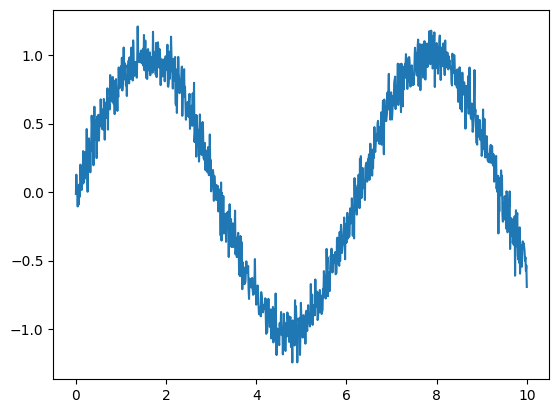

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = [z*0.01 for z in range(0, 1001)]
y = np.sin(x)
y = y + np.random.normal(0, 0.1, len(x))

plt.plot(x, y)
plt.show()

In [15]:
sine_wave = pd.DataFrame({
  'a':x,
  'b':y
})

sine_wave_h2o = h2o.H2OFrame(sine_wave, destination_frame='sine_wave')

sine_wave_h2o.summary()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C:\Users\jorda\AppData\Local\Temp\ipykernel_26340\751314858.py:8: H2ODeprecationWarning: ``summary()`` is deprecated, please use ``show_summary()`` or ``get_summary()`` instead
  sine_wave_h2o.summary()


,a,b
type,real,real
mins,0.0,-1.2434924474343552
mean,4.999999999999934,0.1831553978807132
maxs,10.0,1.208644615915418
sigma,2.891081112663593,0.6756864946326182
zeros,1,0
missing,0,0
0,0.0,-0.014027871742162587
1,0.01,0.12722556844867097
2,0.02,0.02502362788754471
